In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

In [2]:
delta_m1545 = -1.545
delta_4455 = 4.455
delta_4955 = 4.955
delta_13455 = 13.455
d_m1545 = '-1.545'
d_4455 = '4.455'
d_4955 = '4.955'
d_13455 = '13.455'

In [3]:
df = pd.read_csv('./../../Data/QMC_Data/kz_qmc_samples/avg_observables.csv', sep=',')
deltas = np.array(df["delta"])
energies = np.array(df["energy"])
e_errors = np.array(df["energy_error"])
chks = np.array(df["chk"])
chk_errors = np.array(df["chk_error"])

In [4]:
qmcE_m1545 = np.array(df["energy"])[np.where(df["delta"]==delta_m1545)]
Eerr_m1545 = np.array(df["energy_error"])[np.where(df["delta"]==delta_m1545)]
qmcE_4455 = np.array(df["energy"])[np.where(df["delta"]==delta_4455)]
Eerr_4455 = np.array(df["energy_error"])[np.where(df["delta"]==delta_4455)]
qmcE_4955 = np.array(df["energy"])[np.where(df["delta"]==delta_4955)]
Eerr_4955 = np.array(df["energy_error"])[np.where(df["delta"]==delta_4955)]
qmcE_13455 = np.array(df["energy"])[np.where(df["delta"]==delta_13455)]
Eerr_13455 = np.array(df["energy_error"])[np.where(df["delta"]==delta_13455)]

In [5]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [20]:
def GetBestEs1(delta,seed,moving_avg_fxn,window,exptrans,qmctrans):
    
    # Read in data
    VMC_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_111/vmc_only/Energy.npy')
    ExpData_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_{seed}/Exp_data/Energy.npy')
    ExpHybrid_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_{seed}/hybrid_train/{exptrans}_ds/lr_5e-05/Energy.npy')
    QMCData_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_{seed}/QMC_data/dset_size_1000/Energy.npy')
    QMCHybrid_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_{seed}/hybrid_train/hybrid_QMC_data/dset_size_1000/{qmctrans}_ds/lr_5e-05/Energy.npy')    

    # Take lowest energy of moving average for each model
    VMC_E = np.min(moving_avg_fxn(VMC_train1,window))
    ExpData_E = np.min(moving_avg_fxn(ExpData_train1,window))
    ExpHybrid_E = np.min(moving_avg_fxn(ExpHybrid_train1,window))
    QMCData_E = np.min(moving_avg_fxn(QMCData_train1,window))
    QMCHybrid_E = np.min(moving_avg_fxn(QMCHybrid_train1,window))
    
    return VMC_E, ExpData_E, ExpHybrid_E, QMCData_E, QMCHybrid_E

In [54]:
def GetBestEs2(delta,seed,moving_avg_fxn,window,exptrans,qmctrans):
    
    # Read in data
    VMC_train2 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_111/vmc_only/Energy.npy')
    Data_train2 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_{seed}/Exp_data/Energy.npy')
    Hybrid_train2 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_{seed}/hybrid_train/{exptrans}_ds/lr_0.001/Energy.npy')
    QMCData_train2 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_{seed}/QMC_data/dset_size_1000/Energy.npy')
    QMCHybrid_train2 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_{seed}/hybrid_train/hybrid_QMC_data/dset_size_1000/{qmctrans}_ds/lr_0.001/Energy.npy')    

    # Take lowest energy of moving average for each model
    VMC_E = np.min(moving_avg_fxn(VMC_train2,window))
    ExpData_E = np.nanmin(moving_avg_fxn(Data_train2,window))
    ExpHybrid_E = np.min(moving_avg_fxn(Hybrid_train2,window))
    QMCData_E = np.nanmin(moving_avg_fxn(QMCData_train2,window))
    QMCHybrid_E = np.nanmin(moving_avg_fxn(QMCHybrid_train2,window))

    return VMC_E, ExpData_E, ExpHybrid_E, QMCData_E, QMCHybrid_E

In [83]:
ExpData_Es1 =[]
ExpH_Es1 = []
QMCData_Es1 =[]
QMCH_Es1 = []
ExpData_Es2 =[]
ExpH_Es2 = []
QMCData_Es2 =[]
QMCH_Es2 = []

deltas = np.array([-1.545,4.455,4.955,13.455])
seeds = np.array([111,333])
window = 25

# exp_t_trans1 = np.array([[510,9100,1900,890],[730,3090,980,980],[540,9820,820,730]])
# exp_t_trans2 = np.array([[70,50,30,90],[90,30,90,30],[90,40,30,140]])
# qmc_t_trans1 = np.array([[490,810,9350,7390],[670,910,5380,8690],[490,840,9150,3300]])
# qmc_t_trans2 = np.array([[70,50,50,110],[130,80,70,120],[80,80,70,160]])

exp_t_trans1 = np.array([[510,9100,1900,890],[540,9820,820,730]])
exp_t_trans2 = np.array([[70,50,30,90],[90,40,30,140]])
qmc_t_trans1 = np.array([[490,810,9350,7390],[490,840,9150,3300]])
qmc_t_trans2 = np.array([[70,50,50,110],[80,80,70,160]])

# exp_t_trans1 = np.array([[510,9100,1900,890]])
# exp_t_trans2 = np.array([[70,50,30,90]])
# qmc_t_trans1 = np.array([[490,810,9350,7390]])
# qmc_t_trans2 = np.array([[70,50,50,110]])

# exp_t_trans1 = np.array([[540,9820,820,730]])
# exp_t_trans2 = np.array([[90,40,30,140]])
# qmc_t_trans1 = np.array([[490,840,9150,3300]])
# qmc_t_trans2 = np.array([[80,80,70,160]])

for i in range(len(deltas)):
    delta_ = deltas[i]
    for j in range(len(seeds)):
        seed_ = seeds[j]
        print(delta_,seed_)
        exptrans1 = exp_t_trans1[j,i]
        qmctrans1 = qmc_t_trans1[j,i]
        exptrans2 = exp_t_trans2[j,i]
        qmctrans2 = qmc_t_trans2[j,i]
    
        VMC1, ExpData_E1, ExpH_E1, QMCData_E1, QMCH_E1 = GetBestEs1(delta_,seed_,movingaverage,window,exptrans1,qmctrans1)
        VMC2, ExpData_E2, ExpH_E2, QMCData_E2, QMCH_E2 = GetBestEs2(delta_,seed_,movingaverage,window,exptrans2,qmctrans2)

        ExpData_Es1.append(ExpData_E1)
        ExpH_Es1.append(ExpH_E1)
        QMCData_Es1.append(QMCData_E1)
        QMCH_Es1.append(QMCH_E1)
        ExpData_Es2.append(ExpData_E2)
        ExpH_Es2.append(ExpH_E2)
        QMCData_Es2.append(QMCData_E2)
        QMCH_Es2.append(QMCH_E2)

-1.545 111
-1.545 333
4.455 111
4.455 333
4.955 111
4.955 333
13.455 111
13.455 333


In [84]:
ExpData_Es1 = np.mean(np.reshape(ExpData_Es1,(4,2)),axis=1)
ExpH_Es1 = np.mean(np.reshape(ExpH_Es1,(4,2)),axis=1)
QMCData_Es1 = np.mean(np.reshape(QMCData_Es1,(4,2)),axis=1)
QMCH_Es1 = np.mean(np.reshape(QMCH_Es1,(4,2)),axis=1)
ExpData_Es2 = np.mean(np.reshape(ExpData_Es2,(4,2)),axis=1)
ExpH_Es2 = np.mean(np.reshape(ExpH_Es2,(4,2)),axis=1)
QMCData_Es2 = np.mean(np.reshape(QMCData_Es2,(4,2)),axis=1)
QMCH_Es2 = np.mean(np.reshape(QMCH_Es2,(4,2)),axis=1)


ExpData_Es1 = np.mean(np.reshape(ExpData_Es1,(4,2)),axis=1)
ExpH_Es1 = np.mean(np.reshape(ExpH_Es1,(4,2)),axis=1)
QMCData_Es1 = np.mean(np.reshape(QMCData_Es1,(4,2)),axis=1)
QMCH_Es1 = np.mean(np.reshape(QMCH_Es1,(4,2)),axis=1)
ExpData_Es2 = np.mean(np.reshape(ExpData_Es2,(4,2)),axis=1)
ExpH_Es2 = np.mean(np.reshape(ExpH_Es2,(4,2)),axis=1)
QMCData_Es2 = np.mean(np.reshape(QMCData_Es2,(4,2)),axis=1)
QMCH_Es2 = np.mean(np.reshape(QMCH_Es2,(4,2)),axis=1)


In [85]:
OneD_energies = np.array([ExpData_Es1,ExpH_Es1,QMCData_Es1,QMCH_Es1])
TwoD_energies = np.array([ExpData_Es2,ExpH_Es2,QMCData_Es2,QMCH_Es2])

In [86]:
compare = np.repeat(np.array([qmcE_m1545,qmcE_4455,qmcE_4955,qmcE_13455]),4,axis=1)
OneD_residuals = abs(OneD_energies-compare.T)
TwoD_residuals = abs(TwoD_energies-compare.T)

In [72]:
print(OneD_residuals)
print(TwoD_residuals)

[[0.06845081 0.11838918 0.21920987 0.47015764]
 [0.01910462 0.05535664 0.05406247 0.05021925]
 [0.03670354 0.10681272 0.0847601  0.01500223]
 [0.02110612 0.05506874 0.0539466  0.0063343 ]]
[[2.44914282e-02 5.90004247e-02 7.04840829e-02 3.26438808e-01]
 [1.13719758e-04 6.36659559e-03 2.75059480e-03 1.90874054e-03]
 [2.89528495e-03 1.33507818e-02 1.26168229e-02 1.11758609e-02]
 [9.84299745e-05 6.06444296e-03 6.24953050e-03 4.10438492e-03]]


# Seed 333

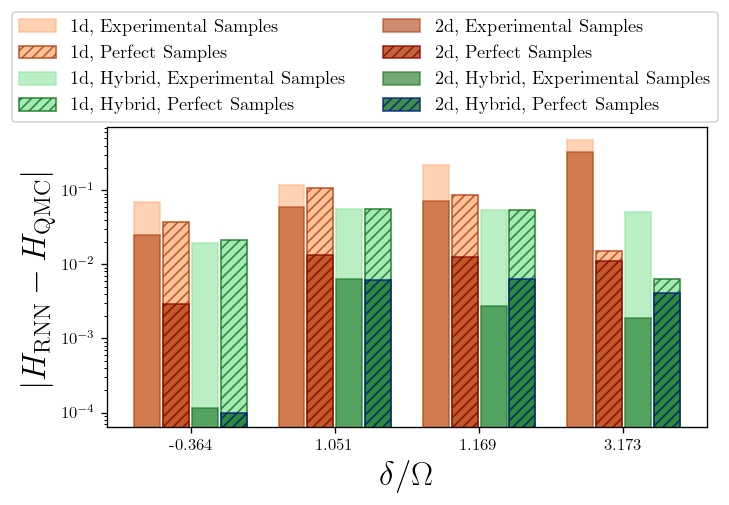

In [78]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})
X = np.arange(4)
X_axis = ['-0.364','1.051','1.169','3.173']
fig = plt.figure(1,figsize=(5,2.5), dpi=120, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')
ax.bar(X - 0.3, OneD_residuals[0], color = colors1[1], alpha=0.6, width = 0.18, edgecolor=colors1[1], linewidth=1, label='1d, Experimental Samples')
ax.bar(X - 0.1, OneD_residuals[2], color = colors1[1], alpha=0.8, width = 0.18, edgecolor=colors2[1], fill=True, hatch='////', linewidth=1, label='1d, Perfect Samples')
ax.bar(X + 0.1, OneD_residuals[1], color = colors1[2], alpha=0.6, width = 0.18, edgecolor=colors1[2], label='1d, Hybrid, Experimental Samples')
ax.bar(X + 0.3, OneD_residuals[3], color = colors1[2], alpha=0.8, width = 0.18, edgecolor=colors2[2], fill=True, hatch='////', linewidth=1, label='1d, Hybrid, Perfect Samples')
ax.bar(X - 0.3, TwoD_residuals[0], color = colors2[1], alpha=0.6, width = 0.18, edgecolor=colors2[1], label='2d, Experimental Samples')
ax.bar(X - 0.1, TwoD_residuals[2], color = colors2[1], alpha=0.8, width = 0.18, edgecolor=colors2[3], fill=True, hatch='////', linewidth=1, label='2d, Perfect Samples')
ax.bar(X + 0.1, TwoD_residuals[1], color = colors2[2], alpha=0.6, width = 0.18, edgecolor=colors2[2], label='2d, Hybrid, Experimental Samples')
ax.bar(X + 0.3, TwoD_residuals[3], color = colors2[2], alpha=0.8, width = 0.18, edgecolor=colors2[0], fill=True, hatch='////', linewidth=1, label='2d, Hybrid, Perfect Samples')
plt.xticks(X, X_axis)
plt.xticks(X, X_axis)
ax.set_yscale('log')
plt.ylabel('$|H_{\\mathrm{RNN}}-H_{\\mathrm{QMC}}|$',fontsize=20)
plt.legend(loc='center', ncol=2,bbox_to_anchor=(0.43, 1.2),fontsize=11)
plt.xlabel('$\\delta/\\Omega$',fontsize=20)
plt.show()

# Seed 111

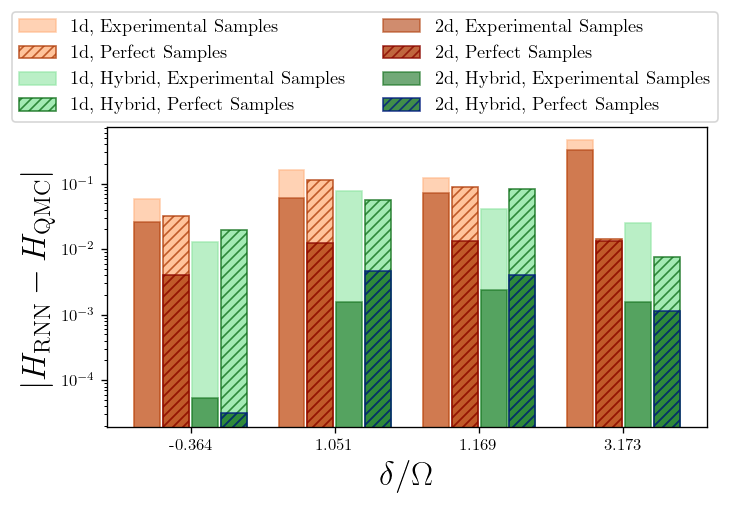

In [82]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})
X = np.arange(4)
X_axis = ['-0.364','1.051','1.169','3.173']
fig = plt.figure(1,figsize=(5,2.5), dpi=120, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')
ax.bar(X - 0.3, OneD_residuals[0], color = colors1[1], alpha=0.6, width = 0.18, edgecolor=colors1[1], linewidth=1, label='1d, Experimental Samples')
ax.bar(X - 0.1, OneD_residuals[2], color = colors1[1], alpha=0.8, width = 0.18, edgecolor=colors2[1], fill=True, hatch='////', linewidth=1, label='1d, Perfect Samples')
ax.bar(X + 0.1, OneD_residuals[1], color = colors1[2], alpha=0.6, width = 0.18, edgecolor=colors1[2], label='1d, Hybrid, Experimental Samples')
ax.bar(X + 0.3, OneD_residuals[3], color = colors1[2], alpha=0.8, width = 0.18, edgecolor=colors2[2], fill=True, hatch='////', linewidth=1, label='1d, Hybrid, Perfect Samples')
ax.bar(X - 0.3, TwoD_residuals[0], color = colors2[1], alpha=0.6, width = 0.18, edgecolor=colors2[1], label='2d, Experimental Samples')
ax.bar(X - 0.1, TwoD_residuals[2], color = colors2[1], alpha=0.8, width = 0.18, edgecolor=colors2[3], fill=True, hatch='////', linewidth=1, label='2d, Perfect Samples')
ax.bar(X + 0.1, TwoD_residuals[1], color = colors2[2], alpha=0.6, width = 0.18, edgecolor=colors2[2], label='2d, Hybrid, Experimental Samples')
ax.bar(X + 0.3, TwoD_residuals[3], color = colors2[2], alpha=0.8, width = 0.18, edgecolor=colors2[0], fill=True, hatch='////', linewidth=1, label='2d, Hybrid, Perfect Samples')
plt.xticks(X, X_axis)
plt.xticks(X, X_axis)
ax.set_yscale('log')
plt.ylabel('$|H_{\\mathrm{RNN}}-H_{\\mathrm{QMC}}|$',fontsize=20)
plt.legend(loc='center', ncol=2,bbox_to_anchor=(0.43, 1.2),fontsize=11)
plt.xlabel('$\\delta/\\Omega$',fontsize=20)
plt.show()

# Average of seed 111 and 333

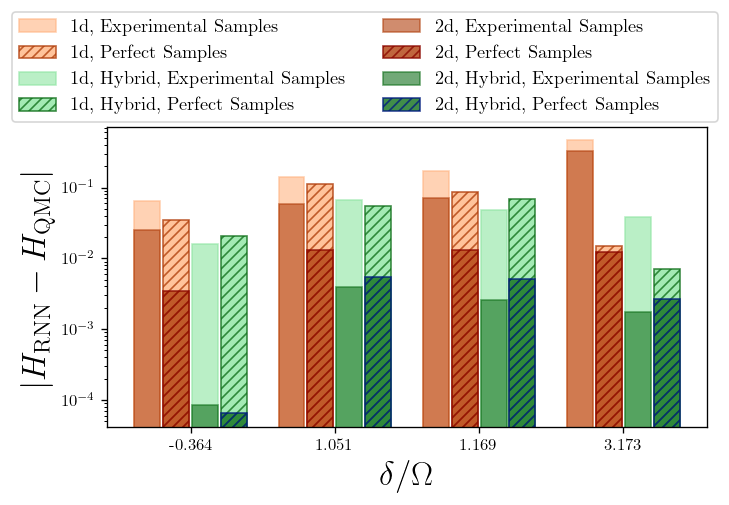

In [87]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})
X = np.arange(4)
X_axis = ['-0.364','1.051','1.169','3.173']
fig = plt.figure(1,figsize=(5,2.5), dpi=120, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')
ax.bar(X - 0.3, OneD_residuals[0], color = colors1[1], alpha=0.6, width = 0.18, edgecolor=colors1[1], linewidth=1, label='1d, Experimental Samples')
ax.bar(X - 0.1, OneD_residuals[2], color = colors1[1], alpha=0.8, width = 0.18, edgecolor=colors2[1], fill=True, hatch='////', linewidth=1, label='1d, Perfect Samples')
ax.bar(X + 0.1, OneD_residuals[1], color = colors1[2], alpha=0.6, width = 0.18, edgecolor=colors1[2], label='1d, Hybrid, Experimental Samples')
ax.bar(X + 0.3, OneD_residuals[3], color = colors1[2], alpha=0.8, width = 0.18, edgecolor=colors2[2], fill=True, hatch='////', linewidth=1, label='1d, Hybrid, Perfect Samples')
ax.bar(X - 0.3, TwoD_residuals[0], color = colors2[1], alpha=0.6, width = 0.18, edgecolor=colors2[1], label='2d, Experimental Samples')
ax.bar(X - 0.1, TwoD_residuals[2], color = colors2[1], alpha=0.8, width = 0.18, edgecolor=colors2[3], fill=True, hatch='////', linewidth=1, label='2d, Perfect Samples')
ax.bar(X + 0.1, TwoD_residuals[1], color = colors2[2], alpha=0.6, width = 0.18, edgecolor=colors2[2], label='2d, Hybrid, Experimental Samples')
ax.bar(X + 0.3, TwoD_residuals[3], color = colors2[2], alpha=0.8, width = 0.18, edgecolor=colors2[0], fill=True, hatch='////', linewidth=1, label='2d, Hybrid, Perfect Samples')
plt.xticks(X, X_axis)
plt.xticks(X, X_axis)
ax.set_yscale('log')
plt.ylabel('$|H_{\\mathrm{RNN}}-H_{\\mathrm{QMC}}|$',fontsize=20)
plt.legend(loc='center', ncol=2,bbox_to_anchor=(0.43, 1.2),fontsize=11)
plt.xlabel('$\\delta/\\Omega$',fontsize=20)
plt.show()